# Assignment 6
## John Edwards

Fastball y(ft) = 4.4149 z(ft) = 20.8302 
Slider y(ft) = 11.4363 z(ft) = 11.5309 
Curveball y(ft) = 7.7925 z(ft) = 4.9194 
Screwball y(ft) = -7.7925 z(ft) = 4.9194


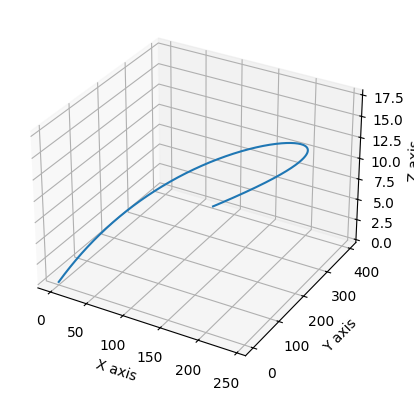

In [22]:
import numpy as np
import matplotlib.pyplot as plt
#define the drag coefficient function
def k_D(v):
    delta = 5.0
    vd = 35.0
    return 0.0039 + 0.0058/(1 + np.exp((v-vd)/delta))
#define euler algorithm
def euler(vx,vy,vz, phi):
    #initial conditions
    x = 0
    y = 0
    z = 1.8 #release height in meters
    t = 0
    h = 0.0001 #time step
    k_L = 4.0E-4
    omega = (2500/60) * 2 * np.pi
    # omega = 3500.0/60.0*2*pi
    g = 9.81
    X,Y,Z = np.zeros(0),np.zeros(0),np.zeros(0)
    
    while x <= 80 and t <= 20: #distance to home base from pitcher's mound
        X = np.append(X, x)
        Y = np.append(Y, y)
        Z = np.append(Z, z)
        v = np.sqrt(vx**2 + vy**2 + vz**2)
        #calculate acceleration components
        ax = -k_D(v)*v*vx + k_L*(vz*omega*np.sin(phi) - y*omega*np.cos(phi))
        ay = -k_D(v)*v*vy + k_L*(vx*omega*np.cos(phi))
        az = -k_D(v)*v*vz - k_L*vx*omega*np.sin(phi) - g
        #apply Euler algorithm
        vx = vx + ax*h
        vy = vy + ay*h
        vz = vz + az*h
        x = x + vx*h
        y = y + vy*h
        z = z + vz*h
        t = t + h
    return y, z
    
    
curveballphi = 45.0*np.pi/180.0 
sliderphi = 0
fastballphi = 225.0
screwballphi = 135*np.pi/180   
v0 = 95
v0 = v0/2.237
theta = 30*np.pi/180.0 # angle from horizontal
vx = v0*np.cos(theta)
vy = 0 #v*sin(theta)
vz = v0*np.sin(theta)

fastbally, fastballz = euler(vx,vy,vz, fastballphi)
slidery, sliderz = euler(vx,vy,vz, sliderphi)
curvebally, curveballz = euler(vx,vy,vz, curveballphi)
screwbally, screwballz = euler(vx,vy,vz, screwballphi)

def converttofeet(x):
    x *  3.28084
    return x

print(f"Fastball y(ft) = {converttofeet(fastbally):.4f} z(ft) = {converttofeet(fastballz):.4f} \nSlider y(ft) = {converttofeet(slidery):.4f} z(ft) = {converttofeet(sliderz):.4f} \nCurveball y(ft) = {converttofeet(curvebally):.4f} z(ft) = {converttofeet(curveballz):.4f} \nScrewball y(ft) = {converttofeet(screwbally):.4f} z(ft) = {converttofeet(screwballz):.4f}")

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.plot(X,Y, zs = Z, zdir = 'z')
plt.show()

Angle = 8.0000 | rpm = 3600.0000 | V0 m/s = 134.0000 | Range (m) = 109.6397
Angle = 23.0000 | rpm = 7200.0000 | V0 m/s = 105.0000 | Range (m) = 25.1063


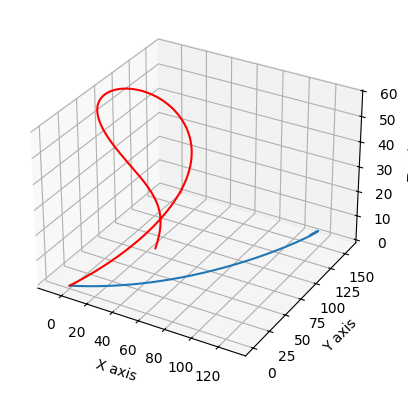

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#define the drag coefficient function
density = 1.2754 #kg/m3
radius = 0.02135 #meters
mass = 0.04593 #kg
cd = 0.3

def k_D():
    A = np.pi*(radius**2)
    return (cd*density*A)/(2*mass)
#define euler algorithm
def euler(vx,vy,vz, phi, rpm=3600):
    #initial conditions
    x = 0
    y = 0
    z = 0 #release height in meters
    t = 0
    h = 0.0001 #time step
    k_L = 1.72E-3
    omega = (rpm/60) * 2 * np.pi
    # omega = 3500.0/60.0*2*pi
    g = 9.81
    X,Y,Z = np.zeros(0),np.zeros(0),np.zeros(0)
    
    while z >= 0 and t <= 10: #distance to home base from pitcher's mound
        X = np.append(X, x)
        Y = np.append(Y, y)
        Z = np.append(Z, z)
        v = np.sqrt(vx**2 + vy**2 + vz**2)
        #calculate acceleration components
        ax = -k_D()*np.abs(vx)*vx + k_L*(vz*omega*np.sin(phi) - vy*omega*np.cos(phi))
        ay = -k_D()*np.abs(vy)*vy + k_L*(vx*omega*np.cos(phi))
        az = -k_D()*np.abs(vz)*vz - k_L*vx*omega*np.sin(phi) - g
        #apply Euler algorithm
        vx = vx + ax*h
        vy = vy + ay*h
        vz = vz + az*h
        x = x + vx*h
        y = y + vy*h
        z = z + vz*h
        t = t + h
        
        rangeofball = X[-1]
    return X, Y, Z, rangeofball
    
def printvalues(angle, rpm, velocity, rangse):
    print(f'Angle = {angle:.4f} | rpm = {rpm:.4f} | V0 m/s = {velocity:.4f} | Range (m) = {rangse:.4f}')

phi = 0
    
    
v0 = 134 #initial Velocity
# v0 = v0/2.237 #mph
theta = 8.0*np.pi/180.0 # angle from horizontal
vx = v0*np.cos(theta)
vy = 0 #v*sin(theta)
vz = v0*np.sin(theta)
X1, Y1, Z1, range1 = euler(vx,vy,vz, phi)

printvalues(8,3600,v0,range1)

phi = 0
v0 = 105 #initial Velocity
# v0 = v0/2.237 #mph
theta = 23.0*np.pi/180.0 # angle from horizontal
vx = v0*np.cos(theta)
vy = 0 #v*sin(theta)
vz = v0*np.sin(theta)
X2, Y2, Z2, range2 = euler(vx,vy,vz, phi,7200)

printvalues(23,7200,v0,range2)


fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.plot(X1,Y1, zs = Z1, zdir = 'z')
ax.plot(X2,Y2, zs = Z2, zdir = 'z', color='red')

plt.show()